## Realizar um projeto utilizando Regressão linear simples

1. Acessar o https://www.kaggle.com/ ✅

2) Selecionar a base de escolha e que se adeque ao modelo ✅

3) Contextualizar o problema a ser resolvido. ✅

4) processamento de dados ✅

5) Analise de variáveis - análise descritiva ✅

6) análise de correlação

7) validação de pressupostos

8) rodar o modelo 

9) interpretação da saída (métricas de avaliação e coeficientes)

Entregar o notebook (em python ou r com as saídas comentadas com a sua interpretação) + a base de dados utilizada. 

In [118]:
## importando as libs
## preparacao dos dados
import pandas as pd

import numpy as np
import csv
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

## vizualizacao dos dados
import matplotlib.pyplot as plt
import plotly.express as px

## Analise
from scipy.stats import shapiro, kstest
from scipy.stats import probplot


## blibliotecas para os modelos de regressao
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

### A base escolhida Auto Sales data for EDA & RFM Analysis
O conjunto de dados contém dados de vendas de uma empresa automobilística.


In [119]:
df = pd.read_csv("./data/Auto Sales data.csv", sep=",")

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


### Contextualizar o problema.
Imagine que você tem varias fabricas e varias lojas onde precisamos vender cada automovel.
E que precisa determinar o valor do preco unico com base no MSRP (que e o valor estipulado pela fabrica).
Geralmente essa parte e fundamentalizada por gestores de peças e engenheiros de produção que validam essa parte.
A ideia principal fazer um modelo de regressção linar para extimar esse valor na prática.



------

### Processamento dos dados

In [120]:
## Aqui vemos que nao tem nenhum valor faltante
df.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [121]:
df.rename(
    columns={
        "ORDERNUMBER": "NUMPEDIDO",
        "QUANTITYORDERED": "QTDEPEDIDA",
        "PRICEEACH": "PRECOUNITARIO",
        "ORDERLINENUMBER": "NUMEROLINHA",
        "SALES": "VENDAS",
        "ORDERDATE": "DATAPEDIDO",
        "DAYS_SINCE_LASTORDER": "DIAS_SINCE_ULTIMOPEDIDO",
        "STATUS": "STATUS",
        "PRODUCTLINE": "LINHAPRODUTO",
        "MSRP": "MSRP",
        "PRODUCTCODE": "CODIGOPRODUTO",
        "CUSTOMERNAME": "NOMECLIENTE",
        "PHONE": "TELEFONE",
        "ADDRESSLINE1": "ENDERECO1",
        "CITY": "CIDADE",
        "POSTALCODE": "CEP",
        "COUNTRY": "PAIS",
        "CONTACTLASTNAME": "SOBRENOMECONTATO",
        "CONTACTFIRSTNAME": "NOMECONTATO",
        "DEALSIZE": "TAMANHODEAL",
    },
    inplace=True,
)

In [122]:
df.head()

,NUMPEDIDO,QTDEPEDIDA,PRECOUNITARIO,NUMEROLINHA,VENDAS,DATAPEDIDO,DIAS_SINCE_ULTIMOPEDIDO,STATUS,LINHAPRODUTO,MSRP,CODIGOPRODUTO,NOMECLIENTE,TELEFONE,ENDERECO1,CIDADE,CEP,PAIS,SOBRENOMECONTATO,NOMECONTATO,TAMANHODEAL
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NUMPEDIDO                2747 non-null   int64  
 1   QTDEPEDIDA               2747 non-null   int64  
 2   PRECOUNITARIO            2747 non-null   float64
 3   NUMEROLINHA              2747 non-null   int64  
 4   VENDAS                   2747 non-null   float64
 5   DATAPEDIDO               2747 non-null   object 
 6   DIAS_SINCE_ULTIMOPEDIDO  2747 non-null   int64  
 7   STATUS                   2747 non-null   object 
 8   LINHAPRODUTO             2747 non-null   object 
 9   MSRP                     2747 non-null   int64  
 10  CODIGOPRODUTO            2747 non-null   object 
 11  NOMECLIENTE              2747 non-null   object 
 12  TELEFONE                 2747 non-null   object 
 13  ENDERECO1                2747 non-null   object 
 14  CIDADE                  

In [124]:
type(df["DATAPEDIDO"][0])

str

In [127]:
## Transformei as datas em datetime
df["MSRP"] = df["MSRP"].map(lambda x: float(x))
df["DATAPEDIDO"] = pd.to_datetime(df["DATAPEDIDO"], format="DD/MM/YYYY")

In [126]:
type(df["DATAPEDIDO"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [128]:
type(df["MSRP"][0])

numpy.float64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NUMPEDIDO                2747 non-null   int64         
 1   QTDEPEDIDA               2747 non-null   int64         
 2   PRECOUNITARIO            2747 non-null   float64       
 3   NUMEROLINHA              2747 non-null   int64         
 4   VENDAS                   2747 non-null   float64       
 5   DATAPEDIDO               2747 non-null   datetime64[ns]
 6   DIAS_SINCE_ULTIMOPEDIDO  2747 non-null   int64         
 7   STATUS                   2747 non-null   object        
 8   LINHAPRODUTO             2747 non-null   object        
 9   MSRP                     2747 non-null   float64       
 10  CODIGOPRODUTO            2747 non-null   object        
 11  NOMECLIENTE              2747 non-null   object        
 12  TELEFONE                 2747 non-

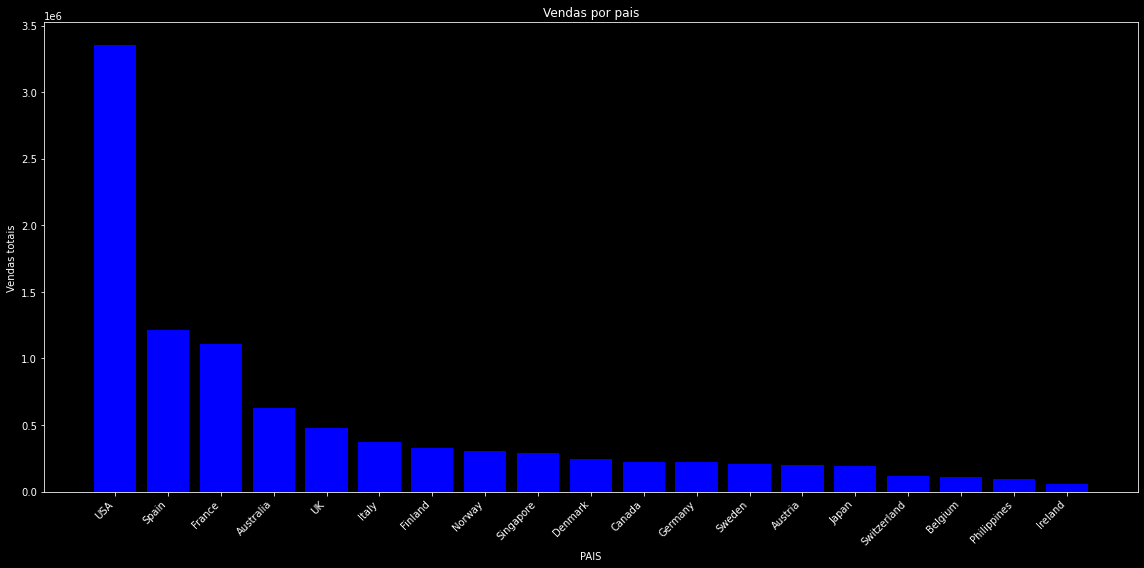

In [130]:
vendas_pais = df.groupby("PAIS")["VENDAS"].sum().reset_index()
vendas_pais = vendas_pais.sort_values(by="VENDAS", ascending=False)

plt.figure(figsize=(16, 8))
plt.bar(vendas_pais["PAIS"], vendas_pais["VENDAS"], color="blue")
plt.title("Vendas por pais")
plt.xlabel("PAIS")
plt.ylabel("Vendas totais")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

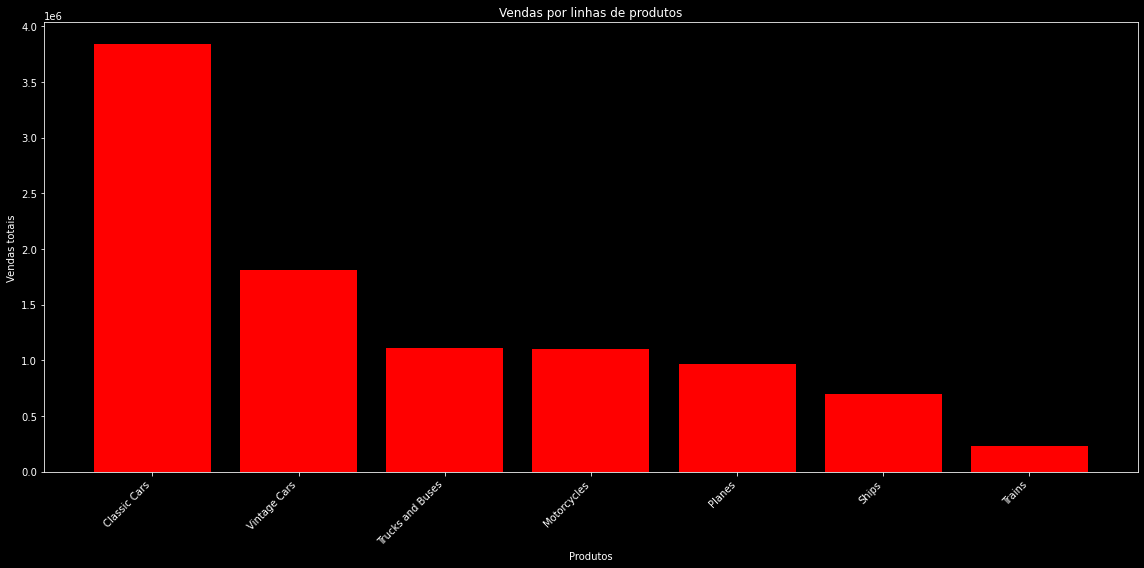

In [131]:
product_vend = df.groupby("LINHAPRODUTO")["VENDAS"].sum().reset_index()
product_vend = product_vend.sort_values(by="VENDAS", ascending=False)

plt.figure(figsize=(16, 8))
plt.bar(product_vend["LINHAPRODUTO"], product_vend["VENDAS"], color="red")
plt.title("Vendas por linhas de produtos")
plt.xlabel("Produtos")
plt.ylabel("Vendas totais")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [132]:
px.histogram(df, x="VENDAS")

In [133]:
px.histogram(df, x="PRECOUNITARIO")

In [134]:
px.box(df, y="PRECOUNITARIO", x="LINHAPRODUTO")

### Teste do Shapiro-Wilk 
$$
H_0 : \text{Dados possuem distribuição normal} \newline H_1 : \text{Dados não possuem distribuição normal}
$$

Nivel de significancia escolhido foi $\alpha = 0.005$

In [142]:
stat, p_value = shapiro(df["VENDAS"])
print(f"Statatistica = {stat:.4}, p-value={p_value:.4}")
if p_value > 0.005:
    print("Dados possuem distribuição normal")
else:
    print("Dados não possuem distribuição normal")


Statatistica = 0.9261, p-value=8.518e-35
Dados não possuem distribuição normal


-----

### Analisando a correlação

In [26]:
correlacoes = df.corr(method="pearson")
correlacoes

,NUMPEDIDO,QTDEPEDIDA,PRECOUNITARIO,NUMEROLINHA,VENDAS,DIAS_SINCE_ULTIMOPEDIDO,MSRP
NUMPEDIDO,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910
QTDEPEDIDA,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551
PRECOUNITARIO,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397091,0.778393
NUMEROLINHA,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956
VENDAS,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849
DIAS_SINCE_ULTIMOPEDIDO,-0.251476,-0.021923,-0.397091,0.046615,-0.334274,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000


In [28]:
correlacoes[correlacoes > 0.6]

,NUMPEDIDO,QTDEPEDIDA,PRECOUNITARIO,NUMEROLINHA,VENDAS,DIAS_SINCE_ULTIMOPEDIDO,MSRP
NUMPEDIDO,1.0,NaN,NaN,NaN,NaN,NaN,NaN
QTDEPEDIDA,NaN,1.0,NaN,NaN,NaN,NaN,NaN
PRECOUNITARIO,NaN,NaN,1.000000,NaN,0.808287,NaN,0.778393
NUMEROLINHA,NaN,NaN,NaN,1.0,NaN,NaN,NaN
VENDAS,NaN,NaN,0.808287,NaN,1.000000,NaN,0.634849
DIAS_SINCE_ULTIMOPEDIDO,NaN,NaN,NaN,NaN,NaN,1.0,NaN
MSRP,NaN,NaN,0.778393,NaN,0.634849,NaN,1.000000


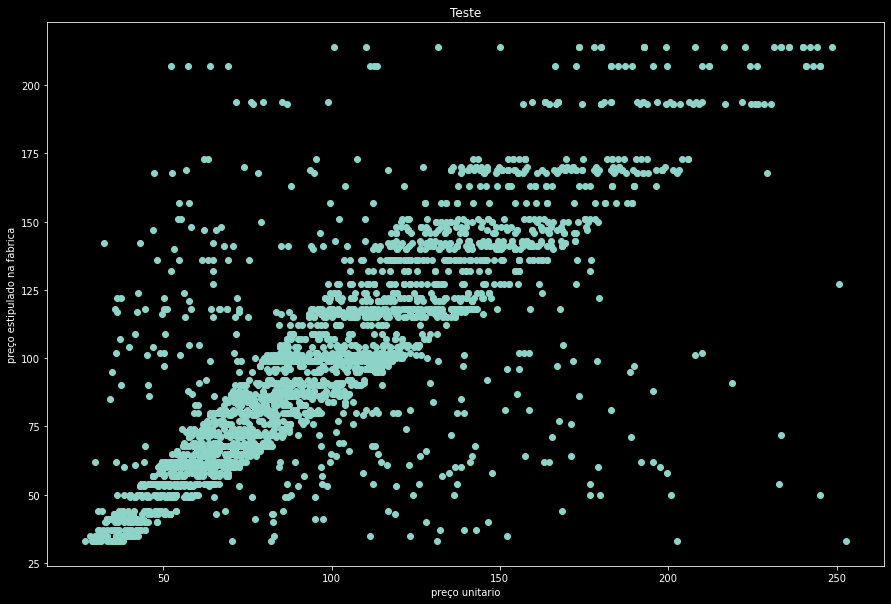

In [41]:
plt.figure(figsize=(15, 10))
plt.scatter(df["PRECOUNITARIO"], df["MSRP"])
plt.title("Teste")
plt.xlabel("preço unitario")
plt.ylabel("preço estipulado na fabrica")
plt.grid(False)
plt.show()

----

### Calculando a regressao Linear pela lib statsmods

In [143]:
regressao = smf.ols("MSRP ~ PRECOUNITARIO", data=df).fit()

In [144]:
residuos = regressao.resid
residuos

0       -1.681851
1        8.975923
2       -0.968857
3        7.557362
4       -2.394845
          ...    
2742   -54.951289
2743   -73.496560
2744   -65.178297
2745   -17.831040
2746   -20.267103
Length: 2747, dtype: float64

### 1º Pressuposto - Teste de Normalidade dos resíduos

$$
H_0 = \text{distribuição normal} : p > 0.05 \newline

H_1 = \text{distribuição} != normal : p <= 0.05
$$

In [146]:
estatistica, p = shapiro(residuos)
print("Estatística de teste: {}".format(estatistica))
print("p-valor: {}".format(p))

Estatística de teste: 0.8617083430290222
p-valor: 5.465064010866787e-44


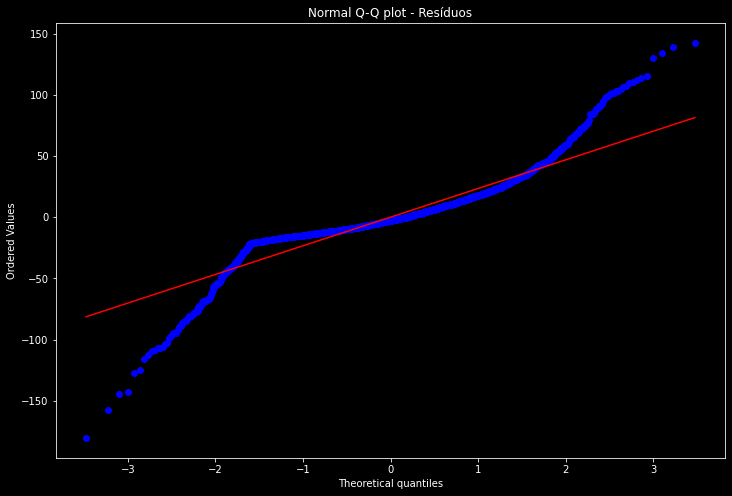

In [152]:
plt.figure(figsize=(12, 8))
probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Analisando os outliers 

In [153]:
outliers = regressao.outlier_test()

In [154]:
outliers.max()

student_resid    5.692488
unadj_p          0.999824
bonf(p)          1.000000
dtype: float64

In [155]:
outliers.min()

student_resid   -7.248172e+00
unadj_p          5.466103e-13
bonf(p)          1.501539e-09
dtype: float64

Como o valor não esta entre 3 e -3 singnifica que a regressão tem muitos riziduos

In [156]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4220.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:06:29   Log-Likelihood:                -12760.
No. Observations:                2747   AIC:                         2.552e+04
Df Residuals:                    2745   BIC:                         2.554e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        25.6053      1.252     20.455

----

In [157]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ["Coeficientes"]
print(coefs)

               Coeficientes
Intercept         25.605264
PRECOUNITARIO      0.742702


In [158]:
regressao.params

Intercept        25.605264
PRECOUNITARIO     0.742702
dtype: float64

In [159]:
regressao.predict()

array([ 96.68185118,  86.02407663,  95.9688572 , ..., 119.17829654,
        71.83104029,  74.26710304])

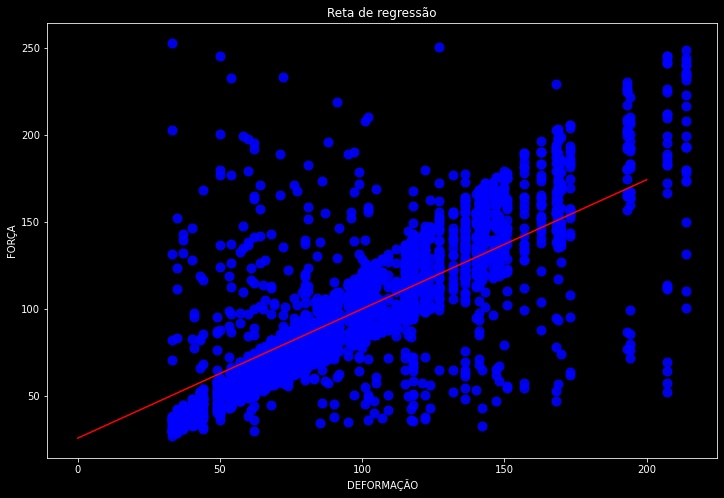

In [171]:
plt.figure(figsize=(12, 8))
plt.scatter(y=df.PRECOUNITARIO, x=df.MSRP, color="blue", s=80, alpha=0.9)
X_plot = np.linspace(0, 200)
plt.plot(X_plot, X_plot * regressao.params[1] + regressao.params[0], color="r")
plt.title("Reta de regressão")
plt.ylabel("FORÇA")
plt.xlabel("DEFORMAÇÃO")
plt.show()